# WeatherPy

---

### NOTE:
<h4>
A small python file has been created alongside the Jupyter Notebook `WeatherPy.ipynb` for the  
purpose of creating a separation between the heavy-lifting of graphing methods required by the  
assigned challenge, as a microcosm version of a 'back-end'. Said file is named GCS_Fx.py and  
runs under the alias gcs in the notebook. Modules `numpy`, `matplotlib.pyplot`, `time`, `scipy`,  
and `citipy` have all been transferred to GCS_Fx to enhance readability of WeatherPy and allow  
for focus of modifying data as DataFrames via `pandas` and duplicating graphs with reoccurring  
corrections of labels and titles. The automatic generation of geographic coordinate pairs provided  
in the source code by edX and 2U has also been moved to the backend and given arguments that allow  
for slight customization using `citipy` and `numpy`, as well as the API calls used to retrieve  
the graphed data. The API calls are set by default for the purpose of this challenge but are  
moved to the backend and given arguments to change the queries.

Top-Level graphing methods group multiple matplotlib.pyplot functions together so only one line  
of code must be deployed to create the graphs and display the data/results. Top-level code has  
been given default arguments for preferred outputs but allows for changes based on slightly  
different needs of different data outputs. In doing so, sensitive `pyplot` methods are being  
protected from errors while still allowing for custom outputs. almost all of the methods used  
in the Notebook could be modulated, graphical output is the least subject to changes, whereas  
if the DataFrames used are changed the output will still be correct if 'back-end' directories  
for label constructors are updated accordingly. Additional `update` methods could be added as  
well. Please be advised, this was done for practice as well as improving the usefulness of the  
notebook and cleaning up the code in general.

- Readability
- Easy customization
- Replication
- Protection of sensitive methods
- Separation of dependencies into another Python file:
    - Cleans/protects namespace
    - Creates specific roles --> Which code is more variable?
        - DataFrames are viable to changes
        - Pyplot objects are subject to specific designations/formatting 
            - Methods can always be updated for more label corrections and formatting req
            --> Simply add more names into the directory
        - API call can be considered non-variable but arguments for changing queries are provided
</h4>

---
## Notebook Setup

### Dependencies

In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path

# Personally written functions & Transferred `Starter Code`
import gcs_fx as gcs

# Import OpenWeatherMap API Key
from api_keys import weather_api_key

### Modulated Starter Code

#### Random Coordinate Generator
To generate random geographic coordinates, a list of cities, and perform an API call for each city (method definitions moved to back-end GCS_Fx.py along with libraries time, numpy, and citipy, and requests)

In [2]:
# citipy method moved to backend GCS_Fx.py
# Easy access to custom sizes and specific coordinate ranges through arguments
# METHODS FOR USING CITIPY PROVIDED IN SOURCE CODE BY 'edX/2U'
cities = gcs.city_generator(curve_size = 1500)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


#### OpenWeather API Call
Using OpenWeather API to retrieve weather data from the cities generated. The starter code provided utilized the libraries requests and time to fetch data.

In [3]:
# Use the requests module and the Open Weather API to gather weather data for the list of cities
# SOURCE CODE was provided in Starter Code by edX/2U
api_response = gcs.api_openWeather(cities, weather_api_key, 1000)

You've requested 610 queries. You have 1000 per day.
If you continue you will have only 390 afterwards.

API call canceled! 
Return Code: 0


---
## Requirement 1 - Bivariable graphing

### DataFraming
Use JSON data from API Call to create a new DataFrame - save DataFrame to new CSV for later use

In [4]:
# Convert the cities weather data into a Pandas DataFrame
if type(api_response) is dict:
    api_response = pd.DataFrame(api_response)

    # Show Record Count and Sample Data
    display(api_response.count())
    display(api_response.head())
else:
    print('Avoiding DataFrame creation and data sampling...')

Avoiding DataFrame creation and data sampling...


In [5]:
# Export the City_Data into a csv
# Handles error codes of gcs.api_openWeather()

outPath = Path('output_data')
if outPath.exists():
    print(f'| {outPath.name} directory already exists.\n')
if not outPath.exists():
    Path.mkdir(outPath.name)
    print(f'| New directory {outPath.name} created.\n')

try:
    api_response.to_csv('output_data/cities.csv', index_label = 'City_ID')
    print(f'| CSV file successfully saved')
except:
    if type(api_response) == int:
        if api_response == -1:
            print('| DataFrame export FAILED! API call had error.')
        elif api_response == 0:
            print('| DataFrame export FAILED! API call had canceled.')
        print('| DataFrame NOT initialized!')

| output_data directory already exists.

| DataFrame export FAILED! API call had canceled.
| DataFrame NOT initialized!


In [6]:
# TODO
access_file = Path('output_data/api_limits')
if access_file.exists():
    try:
        with open(access_file, ):
            pass
    except:
        pass

In [7]:
# Read saved data
cityData_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
cityData_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gabane,-24.6667,25.7822,22.29,72,92,1.69,BW,1735604830
1,mayo-belwa,9.0500,12.0500,22.46,24,70,0.99,NG,1735604832
2,grytviken,-54.2811,-36.5092,5.85,79,54,3.07,GS,1735604833
3,ushuaia,-54.8000,-68.3000,8.81,100,100,1.54,AR,1735604588
4,hamilton,39.1834,-84.5333,8.90,78,0,3.09,US,1735604406
...,...,...,...,...,...,...,...,...,...
559,pacocha,-17.5833,-71.3333,19.13,89,100,1.57,PE,1735605515
560,mersing,2.4312,103.8405,25.95,89,20,3.60,MY,1735605516
561,montmagny,48.9734,2.3469,2.02,93,100,4.12,FR,1735605517


### Scatter Plots
Create Plots to Showcase the Relationship Between Weather Variables and Latitude

#### Latitude Vs. Temperature

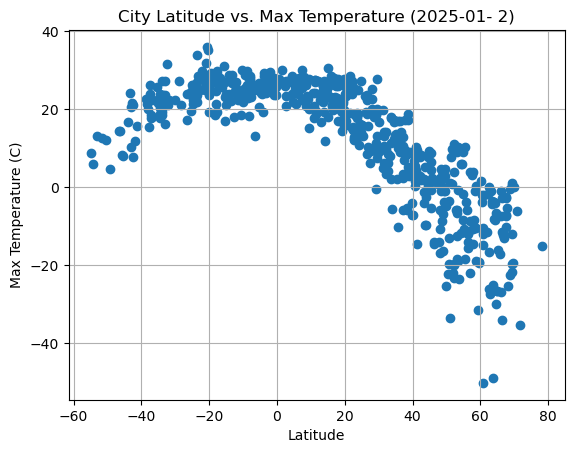

| PyPlot flushed:
| Be advised - not saving


In [8]:
# Build scatter plot for latitude vs. temperature
gcs.s_plot(cityData_df, 'Lat', 'Max Temp')

# Save the figure and show the plot
# TODO gcs.flush('Fig1_Lat_Temp')
gcs.flush()

#### Latitude Vs. Humidity

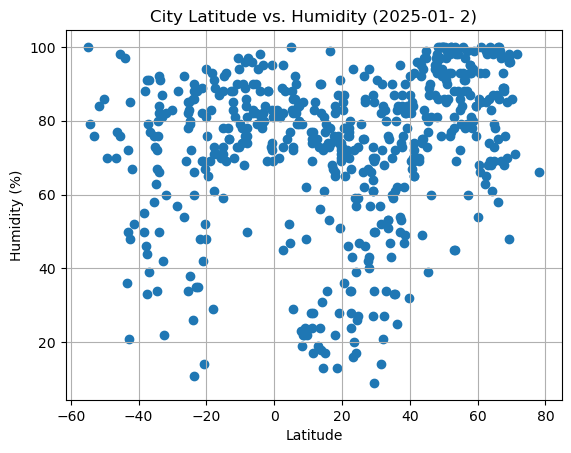

| PyPlot flushed:
| Be advised - not saving


In [9]:
# Build the scatter plots for latitude vs. humidity
gcs.s_plot(cityData_df, 'Lat', 'Humidity')

# Save and show the figure
# TODO gcs.flush('Fig2_Lat_Humidity')
gcs.flush()

#### Latitude Vs. Cloudiness

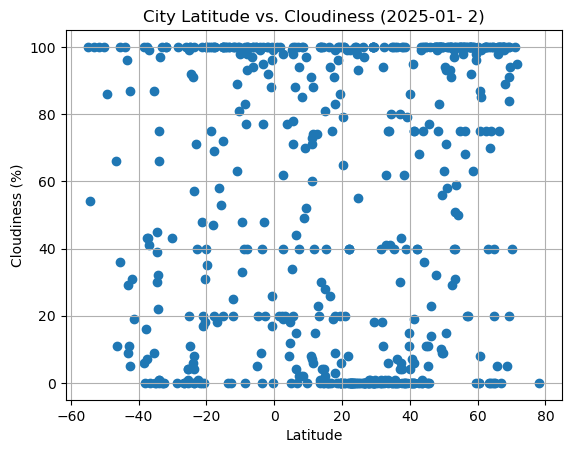

| PyPlot flushed:
| Be advised - not saving


In [10]:
# Build the scatter plots for latitude vs. cloudiness
gcs.s_plot(cityData_df, 'Lat', 'Cloudiness')

# Save and show the figure
# TODO gcs.flush('Fig3_Lat_Clouds')
gcs.flush()

#### Latitude vs. Wind Speed Plot

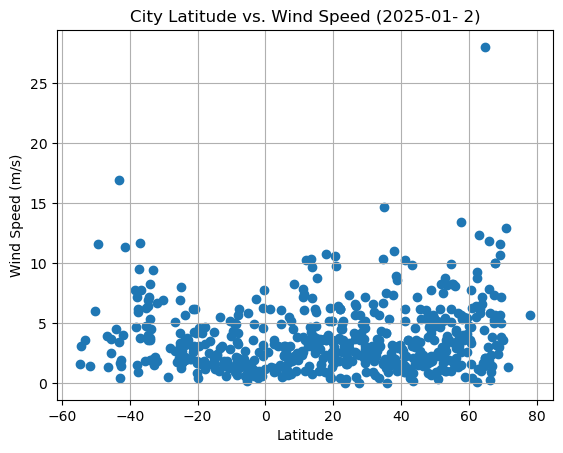

| PyPlot flushed:
| Be advised - not saving


In [11]:
# Build the scatter plots for latitude vs. wind speed
gcs.s_plot(cityData_df, 'Lat', 'Wind Speed')

# Save and show the figure
# TODO gcs.flush('Fig4_Lat_Wind')
gcs.flush()

---
## Requirement 2 - Linear Regression

### DataFraming of Hemispheres

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
hemi_north_df = cityData_df.loc[cityData_df['Lat'] >= 0, :]

# Display sample data
hemi_north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mayo-belwa,9.0500,12.0500,22.46,24,70,0.99,NG,1735604832
4,hamilton,39.1834,-84.5333,8.90,78,0,3.09,US,1735604406
6,jamestown,42.0970,-79.2353,2.79,96,40,3.58,US,1735604715
7,brookings,44.3114,-96.7984,1.14,97,100,3.60,US,1735604839
8,nantucket,41.2835,-70.0995,8.41,93,0,6.17,US,1735604840


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
hemi_south_df = cityData_df.loc[cityData_df['Lat'] < 0, :]

# Display sample data
hemi_south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gabane,-24.6667,25.7822,22.29,72,92,1.69,BW,1735604830
2,grytviken,-54.2811,-36.5092,5.85,79,54,3.07,GS,1735604833
3,ushuaia,-54.8000,-68.3000,8.81,100,100,1.54,AR,1735604588
5,waitangi,-43.9535,-176.5597,16.57,97,100,4.47,NZ,1735604836
10,touros,-5.1989,-35.4608,26.74,79,5,5.84,BR,1735604843


### Multiplot - Linear Regression

####  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7371875859511748
Correlation Coefficient: -0.8585962881070326


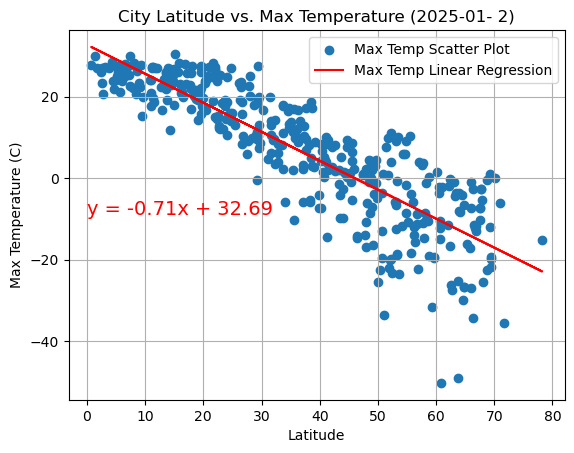

| PyPlot flushed:
| Be advised - not saving


In [14]:
# Linear regression on Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Max Temp', (0, -9))
gcs.flush()

The r^2-value is: 0.3553962084157189
Correlation Coefficient: 0.5961511623872915


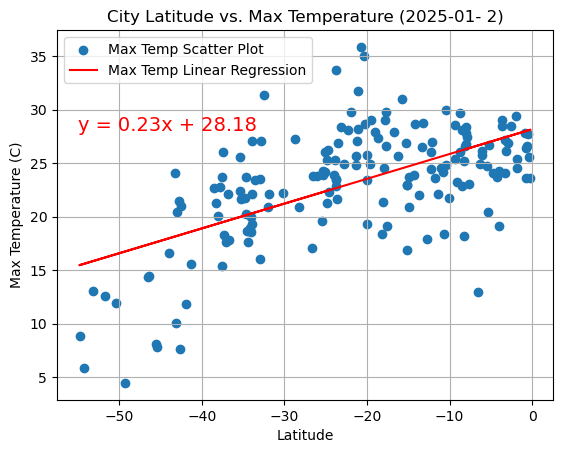

| PyPlot flushed:
| Be advised - not saving


In [15]:
# Linear regression on Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Max Temp', (-55, 28))
gcs.flush()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

#### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.16036953925467462
Correlation Coefficient: 0.40046165765860137


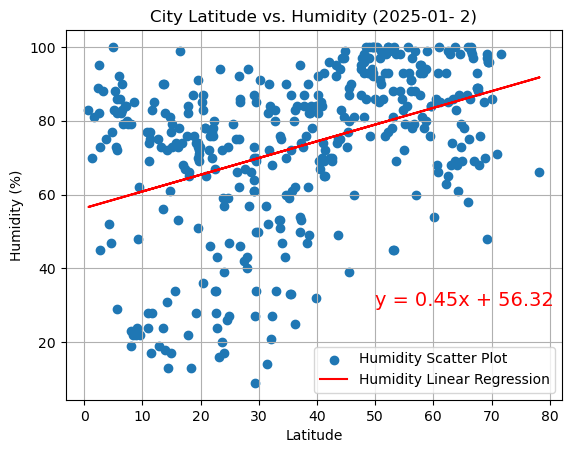

| PyPlot flushed:
| Be advised - not saving


In [16]:
# Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Humidity', (50, 30))
gcs.flush()

The r^2-value is: 0.06879204392384305
Correlation Coefficient: 0.2622823744056071


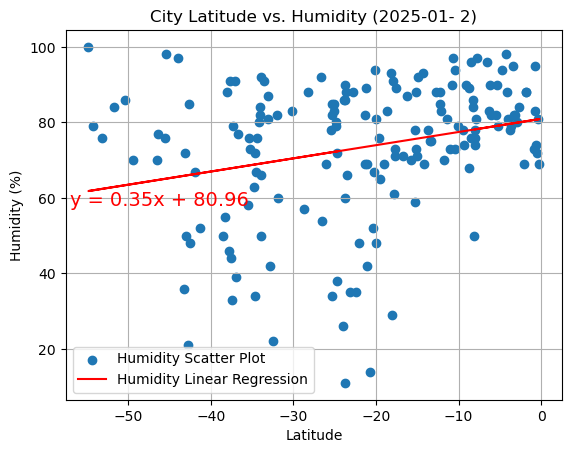

| PyPlot flushed:
| Be advised - not saving


In [17]:
# Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Humidity', (-57, 58))
gcs.flush()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

#### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.08542805610023353
Correlation Coefficient: 0.29228078298142257


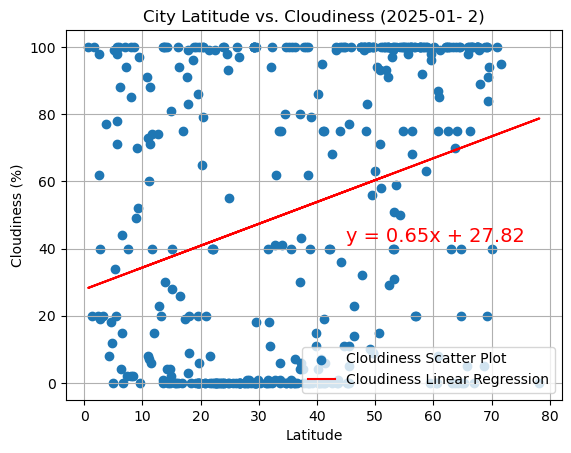

| PyPlot flushed:
| Be advised - not saving


In [18]:
# Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Cloudiness', (45, 42))
gcs.flush()

The r^2-value is: 0.043618882259753154
Correlation Coefficient: 0.20885134009566042


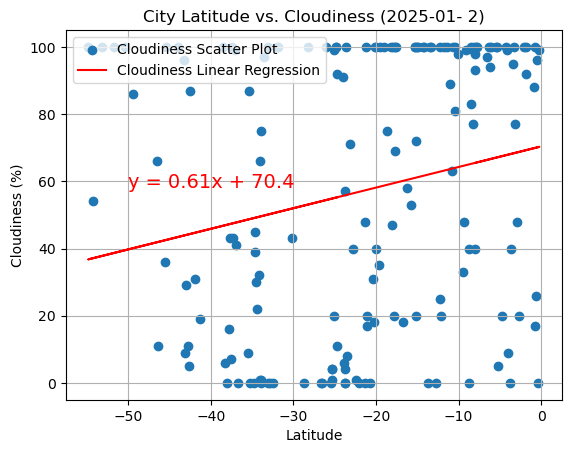

| PyPlot flushed:
| Be advised - not saving


In [19]:
# Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Cloudiness', (-50, 58))
gcs.flush()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

#### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.03242328731373693
Correlation Coefficient: 0.18006467536342863


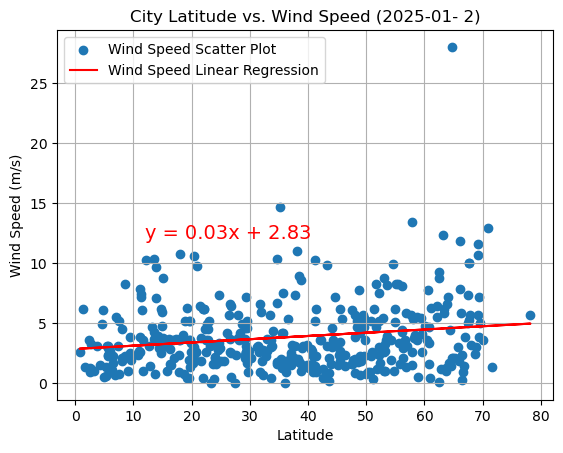

| PyPlot flushed:
| Be advised - not saving


In [20]:
# Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Wind Speed', (12, 12))
gcs.flush()

The r^2-value is: 0.11149351263321555
Correlation Coefficient: -0.33390644293456756


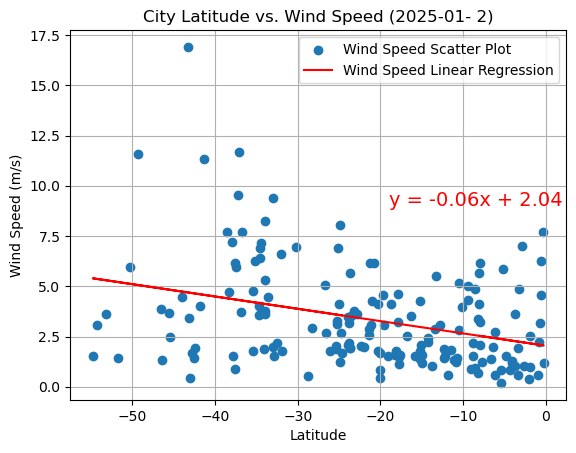

| PyPlot flushed:
| Be advised - not saving


In [21]:
# Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Wind Speed', (-19, 9))
gcs.flush()

**Discussion about the linear relationship:** YOUR RESPONSE HERE